In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import folium
from folium import plugins
import seaborn as sns

In [32]:
# data load
df = pd.read_pickle('AfterWrangling.pkl')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [37]:
describe = df.describe()
describe[['Tenure Months','Monthly Charges','Total Charges','Churn Value','Churn Score']]

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370,58.699418
std,24.559481,30.090047,2266.794470,0.441561,21.525131
min,0.000000,18.250000,0.000000,0.000000,5.000000
25%,9.000000,35.500000,398.550000,0.000000,40.000000
50%,29.000000,70.350000,1394.550000,0.000000,61.000000
75%,55.000000,89.850000,3786.600000,1.000000,75.000000
max,72.000000,118.750000,8684.800000,1.000000,100.000000


In [40]:
df[['Tenure Months','Monthly Charges','Total Charges','Churn Value','Churn Score']].corr()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score
Tenure Months,1.000000,0.247900,0.826178,-0.352229,-0.224987
Monthly Charges,0.247900,1.000000,0.651174,0.193356,0.133754
Total Charges,0.826178,0.651174,1.000000,-0.198324,-0.123410
Churn Value,-0.352229,0.193356,-0.198324,1.000000,0.664897
Churn Score,-0.224987,0.133754,-0.123410,0.664897,1.000000


<Axes: >

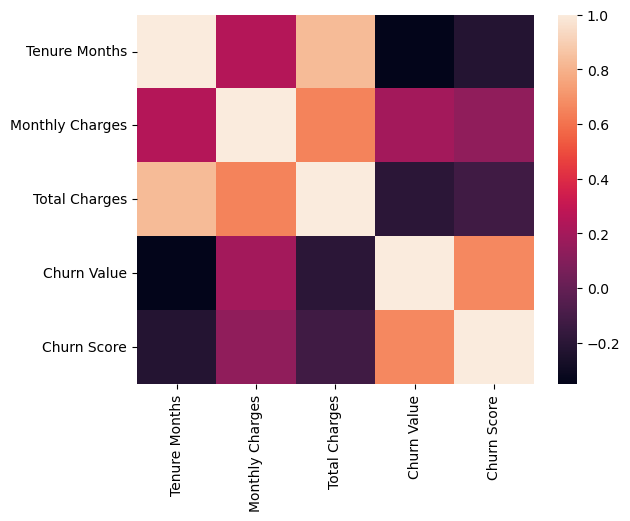

In [39]:
sns.heatmap(df[['Tenure Months','Monthly Charges','Total Charges','Churn Value','Churn Score']].corr())

<Axes: >

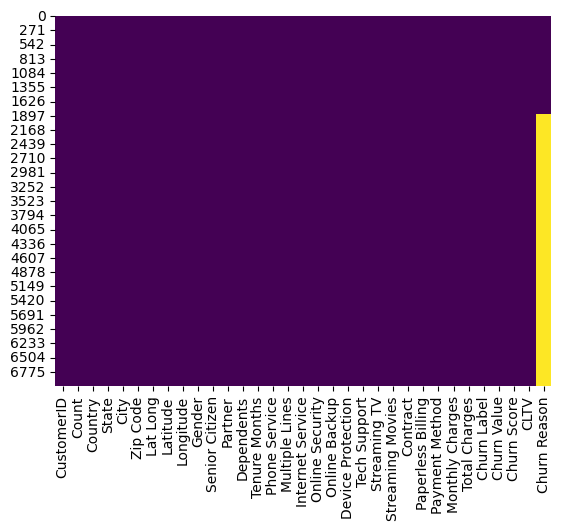

In [25]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

In [5]:
df_yes = df[df['Churn Label'] == "Yes"]
station = df_yes[['Latitude', 'Longitude']]
mapYes = folium.Map(location=[37.255637, -120.493537], zoom_start=6)
stationArr = station.values
mapYes.add_child(plugins.HeatMap(stationArr, radius=15))
mapYes

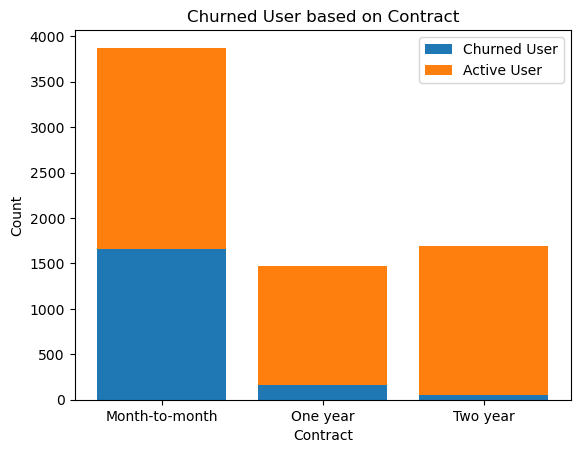

In [18]:
Contract = df.groupby(['Contract','Churn Label'])['Count'].count().to_frame().reset_index()

categories = Contract['Contract'].drop_duplicates()
values1 = Contract[Contract['Churn Label']=='Yes']['Count']
values2 = Contract[Contract['Churn Label']=='No']['Count']

# Create the stacked bar graph
plt.bar(categories, values1, label='Churned User')
plt.bar(categories, values2, bottom=values1, label='Active User')

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Churned User based on Contract')

# Add a legend
plt.legend()

# Display the plot
plt.show()


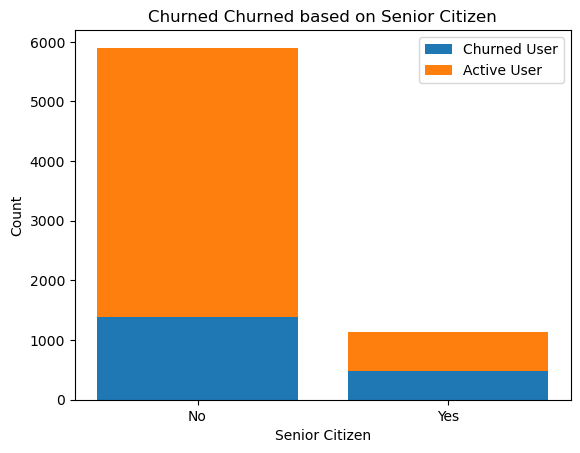

In [7]:
s_citizen = df.groupby(['Senior Citizen','Churn Label'])['Count'].count().to_frame().reset_index()

categories = s_citizen['Senior Citizen'].drop_duplicates()
values1 = s_citizen[s_citizen['Churn Label']=='Yes']['Count']
values2 = s_citizen[s_citizen['Churn Label']=='No']['Count']

# Create the stacked bar graph
plt.bar(categories, values1, label='Churned User')
plt.bar(categories, values2, bottom=values1, label='Active User')

# Add labels and title
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Churned Churned based on Senior Citizen')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [27]:
df.select_dtypes('object').columns

Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Reason'],
      dtype='object')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


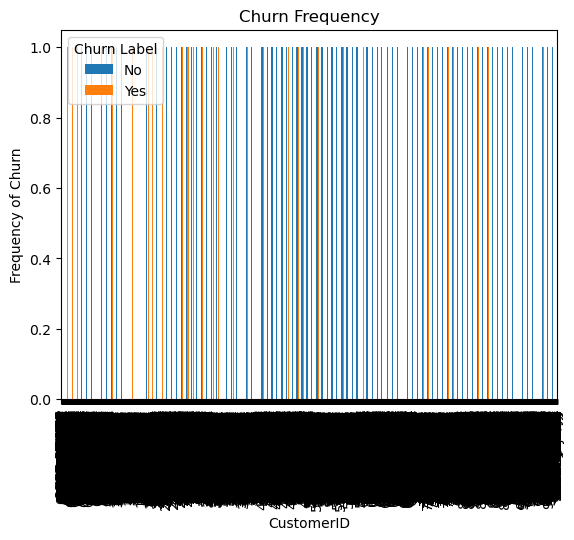

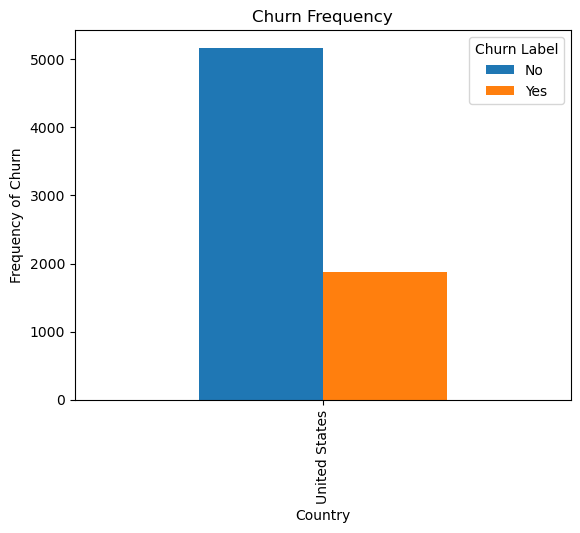

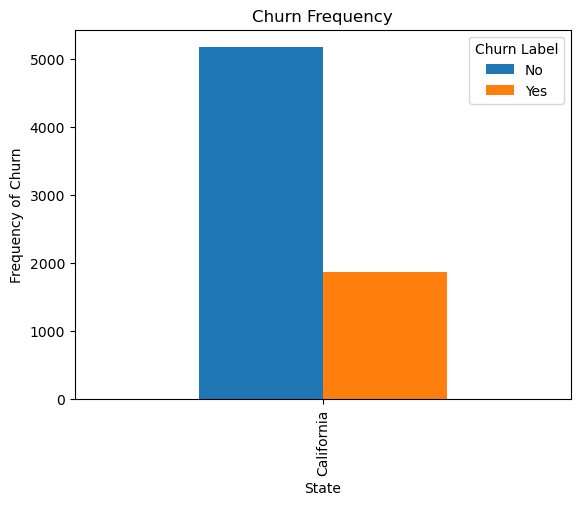

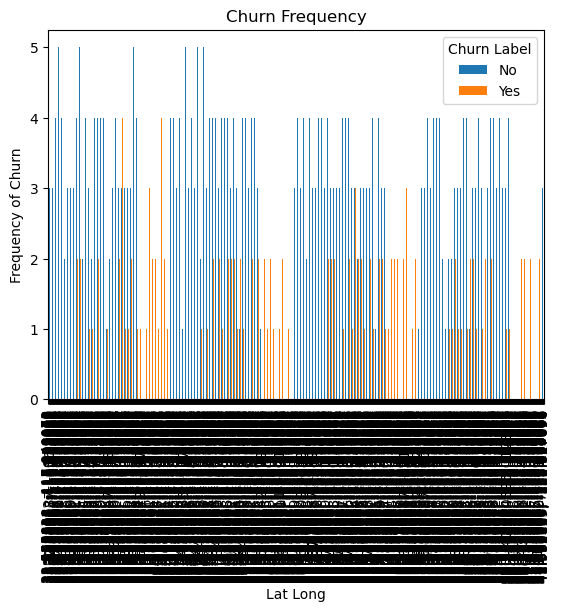

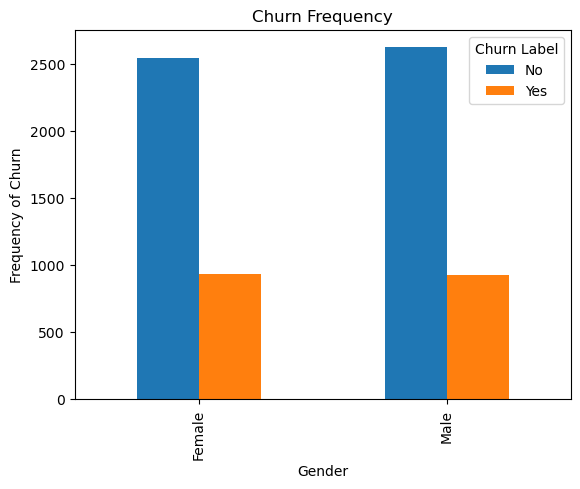

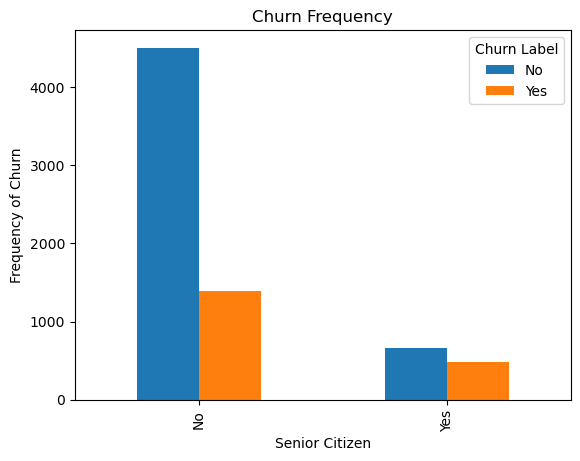

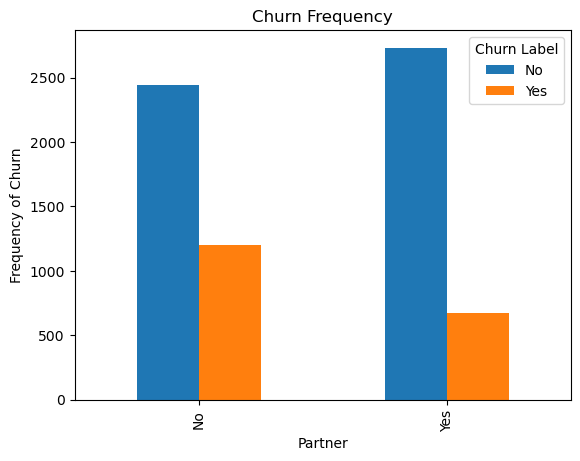

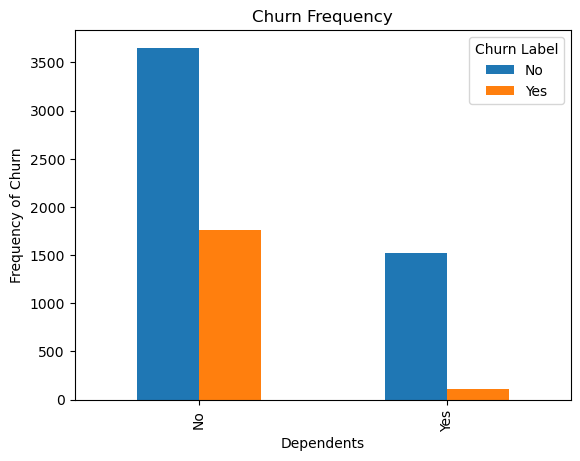

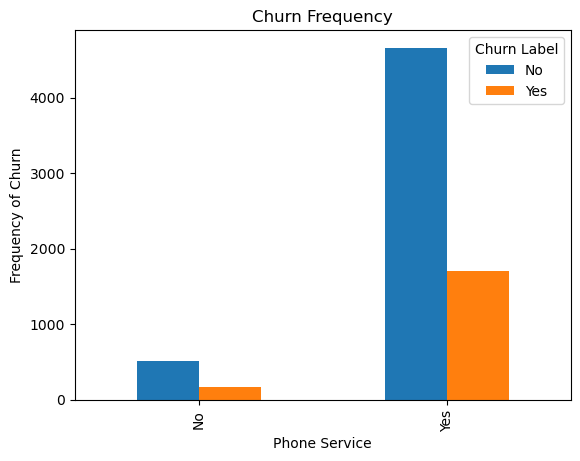

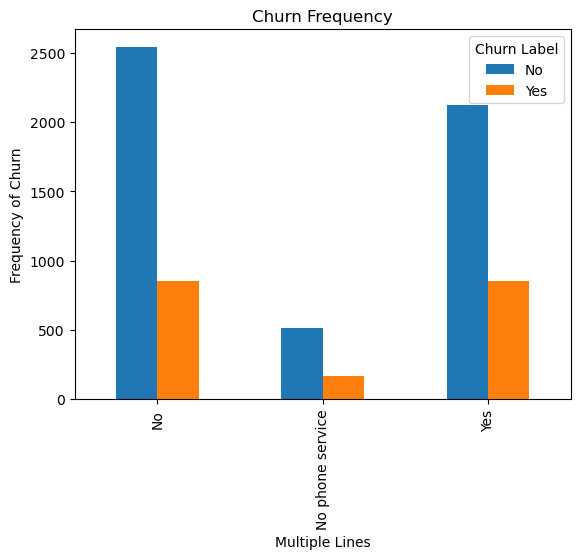

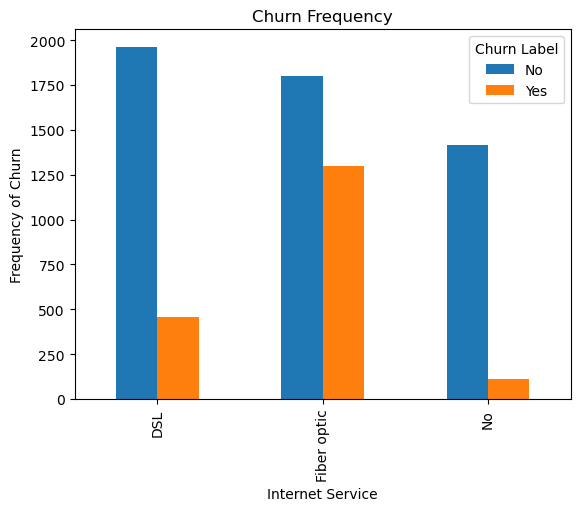

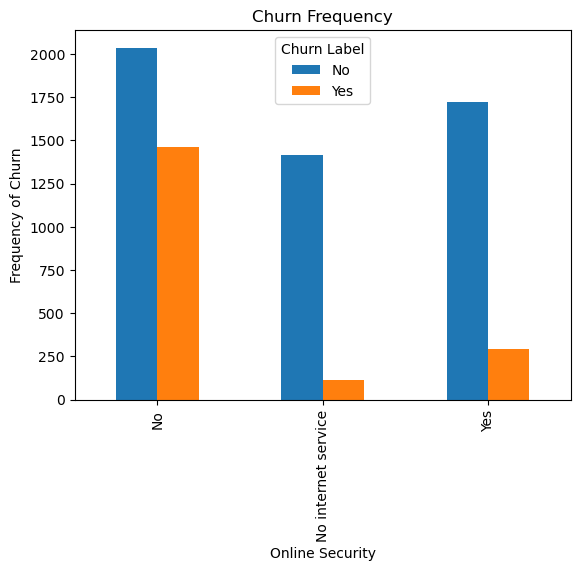

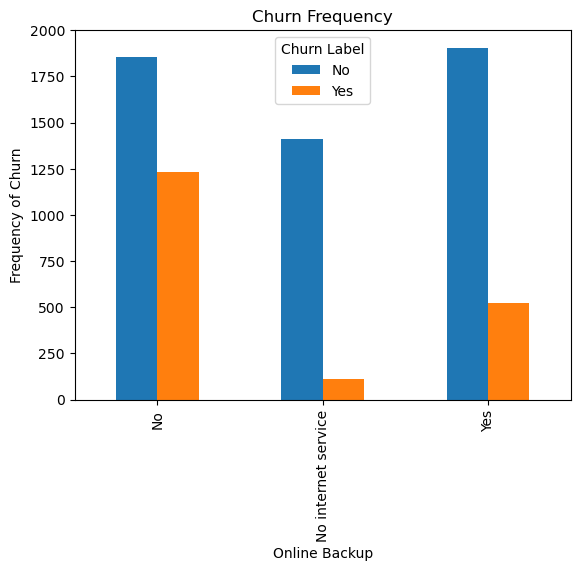

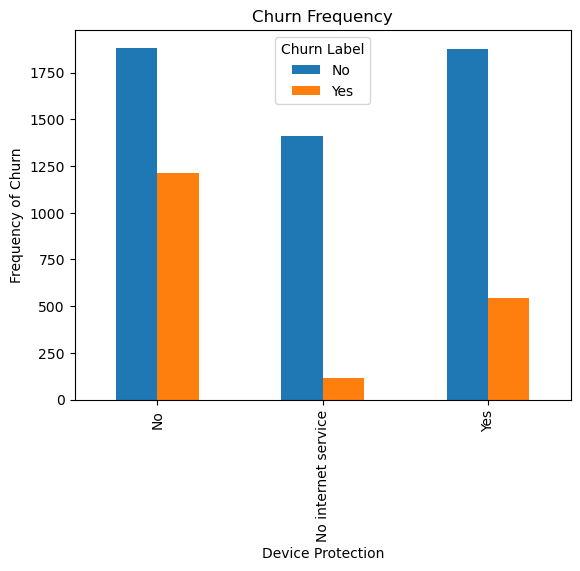

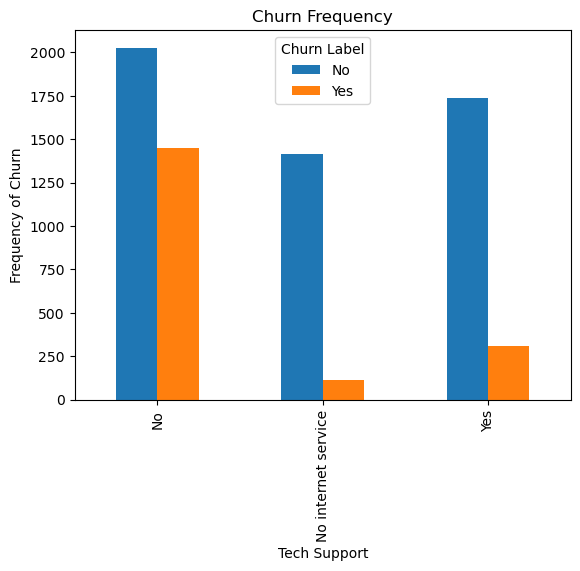

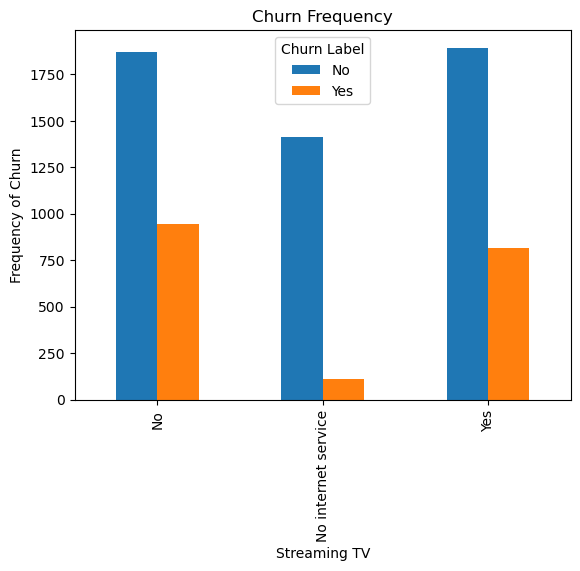

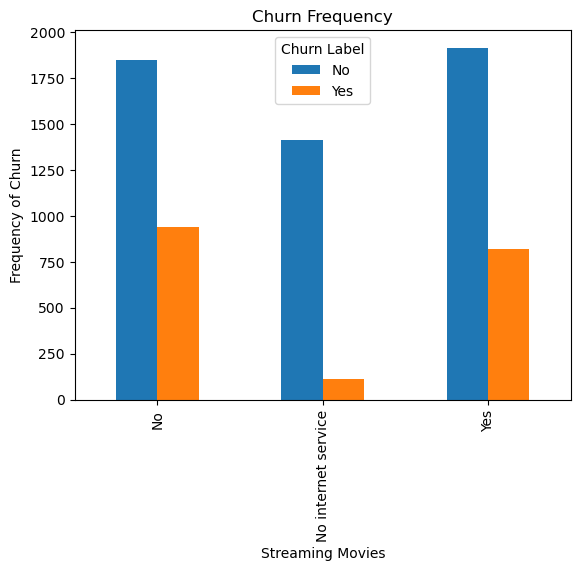

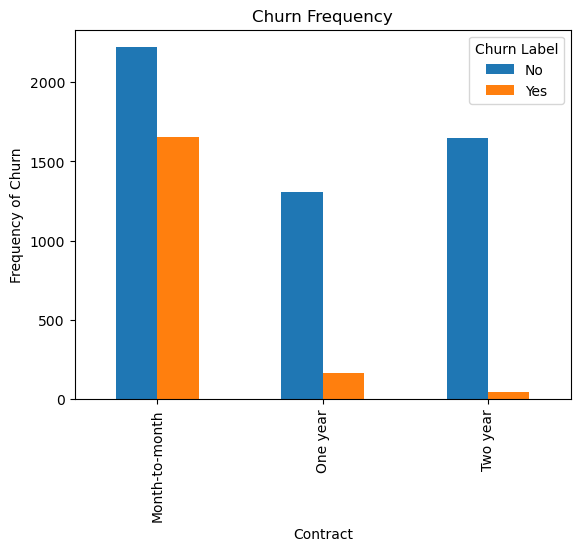

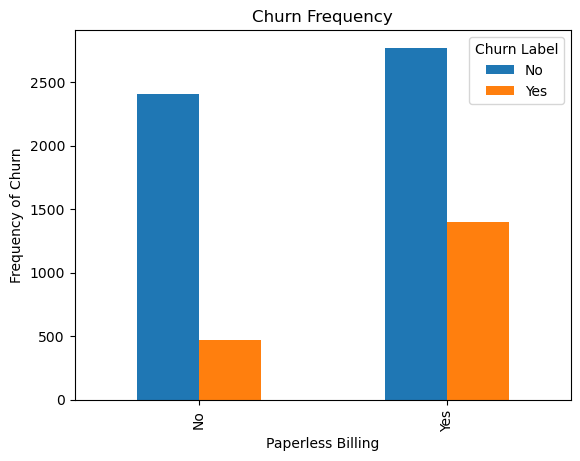

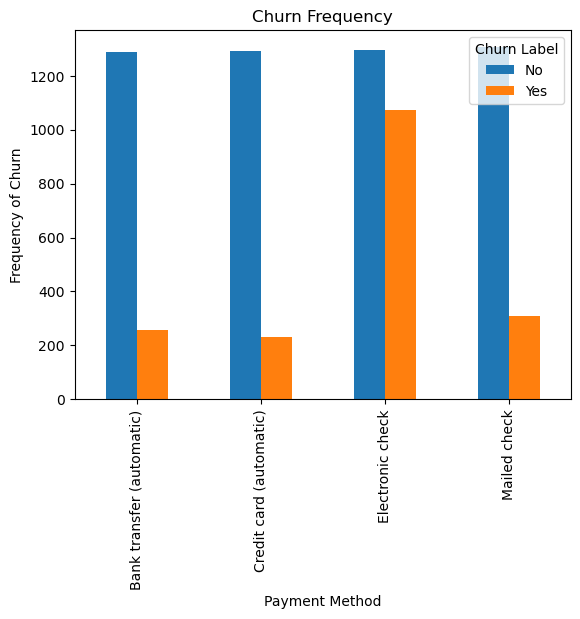

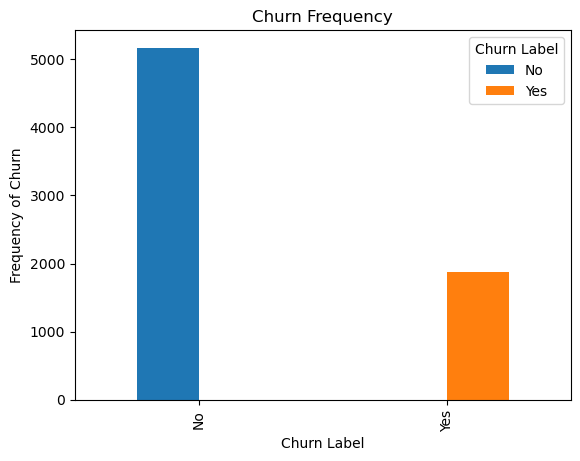

In [28]:
for i in range(len(df.select_dtypes('object').columns)):
    if i == len(df.select_dtypes('object').columns) - 1:
        break
    # city and zip code have too many values. So, we are taking out.
    elif df.select_dtypes('object').columns[i] == 'City':
        continue
    elif df.select_dtypes('object').columns[i] == 'Zip Code':
        continue
        
    else:
        pd.crosstab(df[df.select_dtypes('object').columns[i]], df['Churn Label']).plot(kind='bar')
        plt.title('Churn Frequency')
        plt.xlabel(df.select_dtypes('object').columns[i])
        plt.ylabel('Frequency of Churn')


In [55]:
df.columns = df.columns.str.replace(' ', '_')
formula = 'Churn_Label ~ Total_Charges+Churn_Score+CLTV+Gender+Senior_Citizen+Partner+Contract+Paperless_Billing+Payment_Method'
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Generalized Linear Model Regression Results                            
===================================================================================================
Dep. Variable:     ['Churn_Label[No]', 'Churn_Label[Yes]']   No. Observations:                 7043
Model:                                                 GLM   Df Residuals:                     7030
Model Family:                                     Binomial   Df Model:                           12
Link Function:                                       Logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -1373.2
Date:                                     Thu, 12 Oct 2023   Deviance:                       2746.4
Time:                                             14:04:03   Pearson chi2:                 3.21e+03
No. Iterations:                                          8   Pseudo R-squ. (CS):             0.5357
Covariance Type:                                 nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    14.7303      0.535     27.551      0.000      13.682      15.778
Gender[T.Male]                                0.0378      0.097      0.390      0.697      -0.152       0.228
Senior_Citizen[T.Yes]                        -0.5439      0.129     -4.211      0.000      -0.797      -0.291
Partner[T.Yes]                                0.1031      0.104      0.994      0.320      -0.100       0.306
Contract[T.One year]                          1.3363      0.144      9.260      0.000       1.053       1.619
Contract[T.Two year]                          2.5483      0.205     12.459      0.000       2.147       2.949
Paperless_Billing[T.Yes]                     -0.7541      0.108     -7.002      0.000      -0.965      -0.543
Payment_Method[T.Credit card (automatic)]     0.1667      0.164      1.018      0.309      -0.154       0.488
Payment_Method[T.Electronic check]           -0.7188      0.137     -5.231      0.000      -0.988      -0.449
Payment_Method[T.Mailed check]                0.2508      0.161      1.560      0.119      -0.064       0.566
Total_Charges                                 0.0001   3.06e-05      3.823      0.000    5.69e-05       0.000
Churn_Score                                  -0.1988      0.007    -30.318      0.000      -0.212      -0.186
CLTV                                       3.436e-05   4.25e-05      0.809      0.419   -4.89e-05       0.000
=============================================================================================================
"""

In [56]:
print("\nAIC:", model.aic)
print("BIC:", model.bic)


AIC: 2772.3781225333546
BIC: -59537.942025526885


/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
